Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-06 02:41:01--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.176.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.176.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  57.8MB/s    in 3.4s    

2019-11-06 02:41:04 (57.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [4]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [5]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [6]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Join Data Practice

**Columns needed is:** product_name, product_id, add_to_cart_order, and order_id

**DataFrames:** order_products__train, order_products__prior, and products

In [0]:
##### YOUR CODE HERE #####

###Read the files into data sets and look at the columns in each one

In [7]:
# read the files into data sets and look at the columns in each one
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.columns
## Need this one

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [8]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.columns
# merge this with one above

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [9]:
aisles = pd.read_csv('aisles.csv')
aisles.columns
# don't need this for this challenge

Index(['aisle_id', 'aisle'], dtype='object')

In [10]:
departments = pd.read_csv('departments.csv')
departments.columns
# don't need this for this challenge

Index(['department_id', 'department'], dtype='object')

In [11]:
orders = pd.read_csv('orders.csv')
orders.columns
# don't need this for this challenge

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [12]:
products = pd.read_csv('products.csv')
products.columns
## Need this one

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

###Start merging data set together

In [13]:
# Concatenate the two order products together
order_products = pd.concat([order_products__prior, order_products__train], axis = 0)
print(order_products.shape)
order_products = order_products.reset_index()
order_products.tail()


(33819106, 4)


,index,order_id,product_id,add_to_cart_order,reordered
33819101,1384612,3421063,14233,3,1
33819102,1384613,3421063,35548,4,1
33819103,1384614,3421070,35951,1,1
33819104,1384615,3421070,16953,2,1
33819105,1384616,3421070,4724,3,1


In [14]:
# Trim off columns we don't need
order_products = order_products[['product_id', 'add_to_cart_order']]
order_products.head()

,product_id,add_to_cart_order
0,33120,1
1,28985,2
2,9327,3
3,45918,4
4,30035,5


In [16]:
# Trim off columns we don't need
products = products[['product_id', 'product_name']]
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [17]:
# merge the two data frames together
full_product_orders = pd.merge(order_products, products, on='product_id', 
                               how='inner')
full_product_orders.sample(6)
#Turns out I didn't need the add_to_cart_order because it was not 
# what I thought it was.

,product_id,add_to_cart_order,product_name
26587346,8053,6,Organic Pineapple Chunks
5769227,35887,32,Organic Mixed Vegetables
31902107,18353,49,Traditional Chicken Burrito
25509910,8695,15,Hot! Jalapeno Potato Chips
32091997,809,1,Bolani Pumpkin Filled Flatbread
22877941,43504,9,Organic Chicken Strips


In [27]:
# Here are the top 10 ordered products and how many times they were ordered.
full_product_orders['product_name'].value_counts(ascending=False)[:10]

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [148]:
# Look at the format
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [154]:
# pivot table this
p_flights = flights.pivot_table(index='year', columns='month', values='passengers')
p_flights.head(12)

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


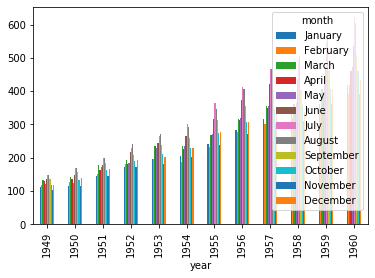

In [153]:
# added a visulization.
p_flights.plot(kind='bar');

## Instructor Code

In [0]:
##### YOUR CODE HERE #####

###1.1 Concatinate

In [28]:
# Create df1
df1 = pd.DataFrame([ ['a', 1], ['b', 2] ], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [29]:
# Create df1
df2 = pd.DataFrame([ ['c', 3], ['d', 4] ], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [31]:
# concate them one on top of the other
df3 = pd.concat([df1,df2], axis=0)
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [32]:
# now next to each other
df4 = pd.concat([df1, df2], axis=1)
df4.columns=['a', 'b', 'c', 'd']
df4

,a,b,c,d
0,a,1,c,3
1,b,2,d,4


###1.2 Merge

In [33]:
# stock names
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 
                         'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [34]:
# stock prices.
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'],
                         'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [35]:
# Merge these data frames
named_stocks = pd.merge(openprice, stockname, on='Symbol')
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [36]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], 
                      '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [45]:
#merge with named_stocks
#full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='inner')
#full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='left')
#full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='right')
full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='outer')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


###1.3 Reshape

In [46]:
full_stocks.shape

(6, 4)

In [0]:
# make a simple table

myindex = ['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame(
            [[np.nan, 2],
             [16 ,11], 
             [3, 1]],
             columns=mycolumns,
             index=myindex
)

In [48]:
#wide format
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [50]:
# transpose
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


####Table 1 Tidy

In [51]:
# columns names to a list
#list(table1.columns)
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [52]:
#index to another list
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [53]:
# for table 1 convert index into a column using reset_index
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [55]:
#Convert from wide to tidy
tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [57]:
# rename columns
tidy1 = tidy1.rename(columns={'index':'name', 'variable':'trt', 'value':'result'})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [58]:
# shorten trt values
tidy1['trt'] = tidy1['trt'].str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


####Table 2 Tidy

In [59]:
# reset index
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [60]:
# tidy it up
tidy2 = table2.melt(id_vars='index', value_vars=['John Smith','Jane Doe','Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [61]:
#rename columns
tidy2 = tidy2.rename(columns={'index':'trt', 'variable':'name', 'value':'result'})
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [62]:
# shorten trt values
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


#### Tidy to Wide Table 1

In [63]:
wide1 = tidy1.pivot_table(index='name', columns='trt', values='result')
wide1

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


#### Tidy to Wide Table 2

In [65]:
wide2 = tidy2.pivot_table(index='trt', columns='name', values='result')
wide2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


###2.1 Concatenating time-series datasets from Chicago


In [0]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [68]:
# Let's take a look at the first quarter.
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [69]:
# Second quarter
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [70]:
# Do they have the same columns
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [71]:
# make a function to check they are exactly the same
def diff_check(list1, list2):
  diff = list(set(list1) - set(list2))
  print("The difference is: ", diff)

#test it out
diff_check(q1.columns, ['from_station_name', 'tripduration', 'from_station_id'])

The difference is:  ['stoptime', 'birthyear', 'starttime', 'to_station_name', 'gender', 'to_station_id', 'trip_id', 'bikeid', 'usertype']


In [72]:
diff_check(q1.columns, q2.columns)
# No difference

The difference is:  []


In [73]:
# Concatenate them
q1_q2=pd.concat([q1,q2], axis=0)
q1_q2.shape

(2000, 12)

In [74]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)

q4 = pd.read_csv(q4_path)

full_year=pd.concat([q1, q2, q3, q4], axis=0)
full_year.shape

(4000, 12)

###2.2 Merging datasets about counties

In [0]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [76]:
# read it into pandas
census = pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
247,8007,Colorado,Archuleta County,12592,6400,6192,18.3,76.7,1.1,2.1,0.7,0.0,9992,48016,5197,29344,2043,11.6,21.3,37.3,17.0,20.0,16.5,9.2,71.0,13.5,0.2,3.7,1.8,9.7,17.2,5696,68.0,15.4,15.9,0.8,5.4
262,8035,Colorado,Douglas County,320940,159804,161136,8.3,83.3,1.1,0.1,4.4,0.1,222455,111154,1484,48725,653,3.6,3.8,53.7,11.6,25.0,4.6,5.0,78.0,6.7,1.9,1.0,1.4,11.0,27.6,169625,83.3,11.6,5.1,0.1,3.3
3016,54049,West Virginia,Marion County,56575,27818,28757,1.2,92.9,3.6,0.1,0.7,0.0,44838,48158,1899,25205,684,16.1,21.9,34.0,19.1,22.0,12.8,12.1,83.6,8.4,0.6,2.8,0.5,4.0,23.8,25174,79.3,16.5,4.1,0.1,5.5
785,18177,Indiana,Wayne County,66972,32387,34585,2.8,88.5,5.0,0.2,1.0,0.0,51530,41813,1479,23895,1102,18.2,26.3,30.2,18.9,21.9,7.9,21.1,83.3,7.2,0.4,3.0,2.4,3.6,19.6,29078,85.1,9.6,5.1,0.2,6.5
2780,49007,Utah,Carbon County,20512,10088,10424,13.2,83.3,0.7,0.8,0.4,0.2,14717,46994,2951,22536,957,16.2,19.2,27.9,19.4,23.2,15.0,14.5,80.9,11.1,0.5,3.4,0.8,3.3,17.7,8906,73.7,21.5,4.3,0.4,5.4


In [77]:
# all the columns
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [78]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
commute=census[['CountyId', 'State', 'County', 'MeanCommute']]
commute.sample(3)

,CountyId,State,County,MeanCommute
911,20047,Kansas,Edwards County,19.2
2265,42043,Pennsylvania,Dauphin County,22.0
334,12031,Florida,Duval County,24.5


In [79]:
# average commute in the USA
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [81]:
usda=pd.read_excel(source2)
usda

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...
...,...,...,...,...,...,...
3216,72145,PR,Vega Baja Municipio,59662,1,Metro - Counties in metro areas of 1 million p...
3217,72147,PR,Vieques Municipio,9301,7,"Nonmetro - Urban population of 2,500 to 19,999..."
3218,72149,PR,Villalba Municipio,26073,2,"Metro - Counties in metro areas of 250,000 to ..."
3219,72151,PR,Yabucoa Municipio,37941,1,Metro - Counties in metro areas of 1 million p...


In [83]:
# What are those RUCC codes all about?
usda.groupby('RUCC_2013')[['Description']].min()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [85]:
# shrink to just what we need
usda=usda[['FIPS', 'RUCC_2013']]
usda.head(3)

,FIPS,RUCC_2013
0,1001,2
1,1003,3
2,1005,6


In [88]:
# Let's merge that with our census data about commute times.
metro_commute = pd.merge(commute, usda, how='left', left_on='CountyId', right_on='FIPS')
metro_commute.sample(3)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
3085,55077,Wisconsin,Marquette County,30.0,55077.0,8.0
2034,38089,North Dakota,Stark County,18.2,38089.0,7.0
3087,55079,Wisconsin,Milwaukee County,22.4,55079.0,1.0


In [89]:
# Is there any difference in commutes by rural-urban designation?
metro_commute[metro_commute['RUCC_2013']==1]['MeanCommute'].mean()

29.51334745762712

In [90]:
# what about rural?
metro_commute[metro_commute['RUCC_2013']==5]['MeanCommute'].mean()

18.686956521739138

In [91]:
# compare means all in one blow using `groupby`
drivetimes = metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


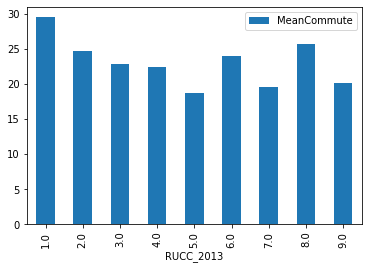

In [92]:
# display
drivetimes.plot(kind='bar');

###3.1. Instacart Dataset: pd.concat and pd.merge

In [93]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-06 03:52:42--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.18.99
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.18.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  93.6MB/s    in 2.1s    

2019-11-06 03:52:44 (93.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [94]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [95]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01/

/content/instacart_2017_05_01/instacart_2017_05_01


In [96]:
# bash command: list the contents of that folder.
!ls 

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


In [97]:
# List the contents of the cwd.
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [98]:
# Read in both the order_products
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.sample(3)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
9658710,1019626,38693,14,0
21033576,2218641,21903,7,1
768312,81315,40009,7,1


In [99]:
order_products__train=pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head(3)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [101]:
# already read in
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [102]:
# already read in and have just what we need
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [103]:
orders.sample(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1139150,2994246,68452,prior,56,4,17,6.0
846177,658068,50842,prior,15,1,13,10.0


In [0]:
# filter this just for columns we need
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders=orders[cols]

In [106]:
# filter for certain rows
condition = (orders['user_id']==1)
condition

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [107]:
orders[condition]

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [108]:
# more complicated condition
condition = (orders['user_id']==1) & (orders['order_number']<=2)
condition

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [0]:
# make it into own dataframe
orders_subset = orders[condition]

In [111]:
#Concatenate order_products__prior and order_products__train

# Redo what I did before
# Concatenate the two order products together
order_products = pd.concat([order_products__prior, order_products__train], axis = 0)
print(order_products.shape)
order_products = order_products.reset_index()

(33819106, 4)


In [114]:
# get subset
condition = (order_products['order_id']==2539329) | (order_products['order_id']==2398795)
condition

0           False
1           False
2           False
3           False
4           False
            ...  
33819101    False
33819102    False
33819103    False
33819104    False
33819105    False
Name: order_id, Length: 33819106, dtype: bool

In [0]:
#make selection of columns
columns = ['order_id', 'add_to_cart_order', 'product_id']

In [117]:
# Use the .loc method to filter rows and columns in a single blow.
order_products_subset = order_products.loc[condition, columns]
order_products_subset

,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088
22742749,2398795,6,13032
24076664,2539329,1,196
24076665,2539329,2,14084
24076666,2539329,3,12427
24076667,2539329,4,26088


In [118]:
# Both of these subsets are now quite small
print(order_products_subset.shape)
orders_subset.shape

(11, 3)


(2, 5)

In [119]:
# find common key
print(order_products_subset.columns)
print(orders_subset.columns)

Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')
Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


In [120]:
# merge with common key
merged = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [123]:
final = pd.merge(merged, products, how='inner', on='product_id')
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


###3.2 Instacart Dataset: melt and pivot_tables

In [127]:
# Read back in the datasets in their original form (no filters).
products = pd.read_csv('products.csv')
products.columns

print(products.shape)
print(order_products.shape)
print(orders.shape)

(49688, 4)
(33819106, 5)
(3421083, 5)


####Subset and Merge

In [0]:
# We only want the first two products.
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [129]:
# sebset for only those two products
condition = products['product_name'].isin(product_names)
products = products[condition]
products

,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [130]:
# associte hour of the day with a specific product.
froyo_cream = (products[['product_id', 'product_name']]
               .merge(order_products[['order_id', 'product_id']])
               .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)
froyo_cream.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
0,9292,Half And Half Ultra Pasteurized,64,16
1,9292,Half And Half Ultra Pasteurized,1883,11
2,9292,Half And Half Ultra Pasteurized,5625,9
3,9292,Half And Half Ultra Pasteurized,7765,14
4,9292,Half And Half Ultra Pasteurized,7906,9


In [131]:
# Subset that one more time
print(product_names)
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]
print(froyo.shape)
print(cream.shape)

['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
(2983, 4)
(2995, 4)


####4 ways to reshape and plot

#####1 Value Counts

In [132]:
# How many orders included cream, in total and at each hour of the day?
cream['order_hour_of_day'].value_counts().sort_index()

0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [0]:
# In percentages
cream_percents = cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

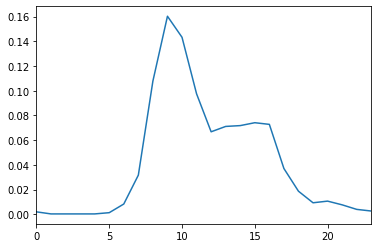

In [134]:
cream_percents.plot();

In [0]:
# same for froyo
froyo_percents = froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

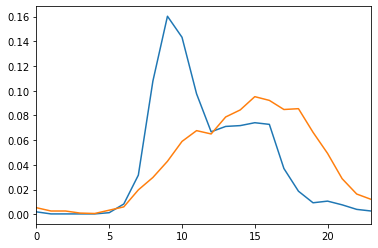

In [136]:
cream_percents.plot()
froyo_percents.plot();

#####2 Crosstab


In [0]:
mycrosstab= pd.crosstab(froyo_cream['order_hour_of_day'], froyo_cream['product_name'], normalize='columns')

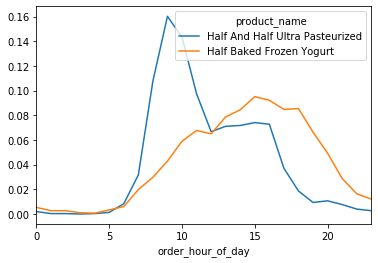

In [139]:
mycrosstab.plot();

#####3 Pivot Table

In [140]:
mypivot = froyo_cream.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len)
mypivot

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,6.0,16.0
1,1.0,8.0
2,1.0,8.0
3,NaN,3.0
4,1.0,2.0
5,4.0,10.0
6,25.0,18.0
7,95.0,59.0
8,323.0,89.0


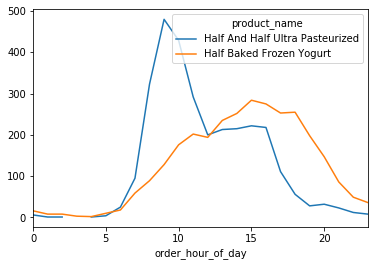

In [142]:
mypivot.plot();

#####4 Melt

In [143]:
mycrosstab

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.002003,0.005364
1,0.000334,0.002682
2,0.000334,0.002682
3,0.000000,0.001006
4,0.000334,0.000670
5,0.001336,0.003352
6,0.008347,0.006034
7,0.031720,0.019779
8,0.107846,0.029836


In [0]:
# convert from wide to tidy
columns={
    'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }

In [145]:
tidy_table = mycrosstab.reset_index().melt(id_vars='order_hour_of_day').rename(columns=columns)
tidy_table

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.002003
1,1,Half And Half Ultra Pasteurized,0.000334
2,2,Half And Half Ultra Pasteurized,0.000334
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000334
5,5,Half And Half Ultra Pasteurized,0.001336
6,6,Half And Half Ultra Pasteurized,0.008347
7,7,Half And Half Ultra Pasteurized,0.031720
8,8,Half And Half Ultra Pasteurized,0.107846
9,9,Half And Half Ultra Pasteurized,0.160267


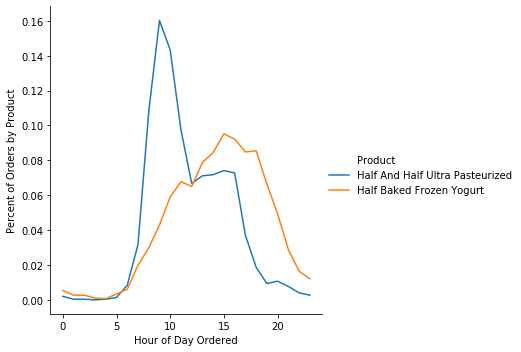

In [146]:
# can plot with seaborn
sns.relplot(x='Hour of Day Ordered',
            y = 'Percent of Orders by Product',
            hue= 'Product',
            data= tidy_table,
            kind='line');

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####